### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

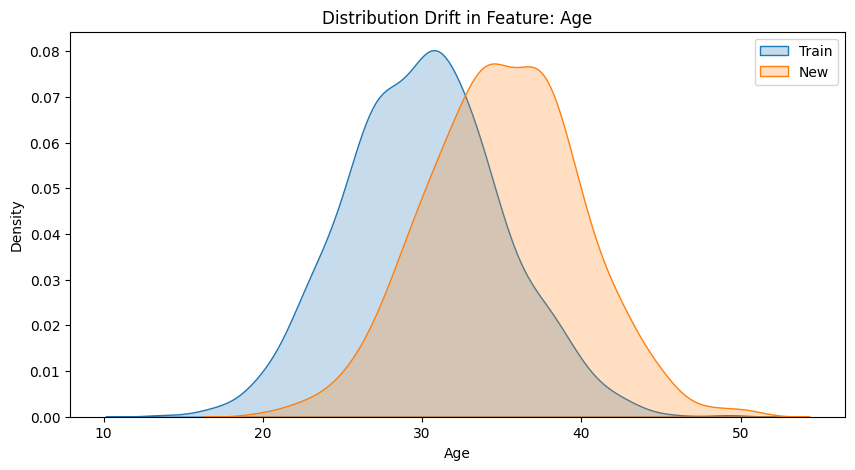

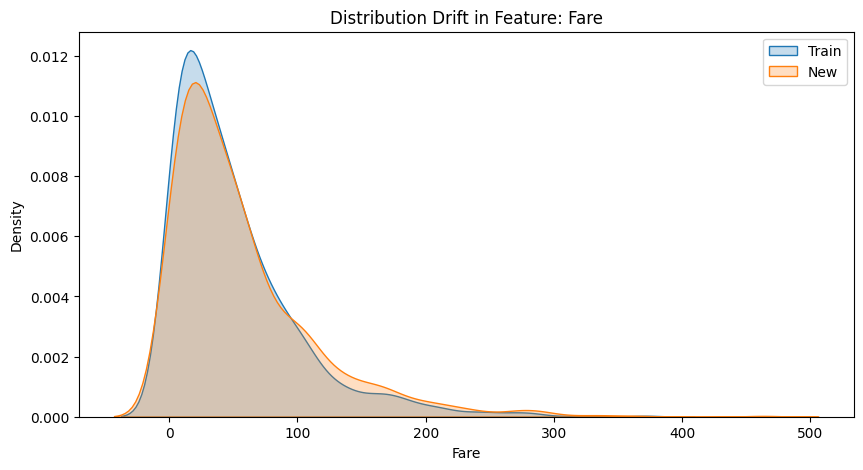

Age → KS p-value: 0.0000 → 🚨 Drift Detected
Fare → KS p-value: 0.1812 → ✅ No Drift


In [1]:
# Write your code from here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
import numpy as np

# --------------------------
# Step 1: Simulate Datasets
# --------------------------

# Simulate a "train" dataset
np.random.seed(42)
train_data = {
    "Age": np.random.normal(loc=30, scale=5, size=1000),
    "Fare": np.random.exponential(scale=50, size=1000)
}

# Simulate a "new" (production) dataset with slight drift
new_data = {
    "Age": np.random.normal(loc=35, scale=5, size=1000),  # Drifted mean
    "Fare": np.random.exponential(scale=60, size=1000)     # Drifted scale
}

train_df = pd.DataFrame(train_data)
new_df = pd.DataFrame(new_data)

# --------------------------
# Step 2: Visualize Feature Drift
# --------------------------

def plot_feature_drift(feature):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(train_df[feature], label="Train", fill=True)
    sns.kdeplot(new_df[feature], label="New", fill=True)
    plt.title(f"Distribution Drift in Feature: {feature}")
    plt.legend()
    plt.show()

plot_feature_drift("Age")
plot_feature_drift("Fare")

# --------------------------
# Step 3: Detect Drift with KS Test
# --------------------------

def detect_drift(feature):
    stat, p_value = ks_2samp(train_df[feature], new_df[feature])
    print(f"{feature} → KS p-value: {p_value:.4f} → {'🚨 Drift Detected' if p_value < 0.05 else '✅ No Drift'}")

detect_drift("Age")
detect_drift("Fare")
